# Data Visualization and EDA

After cleaning and wrangling the data, we are left with 55 columns and ~48k listings. The missing values have been filled in with appropriate values and unnecessary/redundant data has been eliminated.
The most crucial step is visaluzing the data. That is the first step towards understanding the data and proceeding with further analysis. First we need to identify the underlying patterns in the data and figure out which features are useful. We can start with univariate analysis - looking at distribution of one variable at a time, and then follow it up with bivariate and multivariate analyses. As we go along, our understanding of the data will get deeper and we can ask more interesting questions.

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date 
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
data=pd.read_csv('airbnb_data_cleaned.csv')
pd.options.display.max_columns = 100

In [3]:
data.describe()

,neighborhood_overview,transit,access,interaction,house_rules,host_id,host_response_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,zipcode,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
count,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,4.835300e+04,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,4.835300e+04,48353.000000,48353.000000,48353.000000,48353.00000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000,48353.000000
mean,0.616239,0.637665,0.588505,0.573760,0.607160,5.400411e+07,0.515789,0.168697,12.085124,0.998283,0.529957,10660.978347,40.729708,-73.953895,0.831469,2.895250,1.143817,1.181271,1.559552,152.509255,182.499514,51.770397,1.518086,14.199946,6.832647,4.590535e+04,7.718404,21.089343,35.273489,125.33911,22.402933,72.603685,7.424317,7.166319,7.525593,7.540732,7.340723,7.242591,0.349348,0.024363,0.026968,1.140344
std,0.486306,0.480680,0.492110,0.494535,0.488387,6.292731e+07,0.479093,0.374488,92.865347,0.041396,0.499107,885.599394,0.053399,0.043977,0.374341,1.900923,0.438751,0.756892,1.093389,228.889926,433.378901,56.736500,1.140437,23.643454,18.443448,9.766875e+06,9.559070,21.436520,34.181800,138.23637,41.356287,39.950195,4.091406,3.994289,4.134288,4.135037,4.047446,4.011118,0.476769,0.154173,0.161993,1.605117
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.571000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,10001.000000,40.499794,-74.240843,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,6.736799e+06,0.000000,0.000000,1.000000,1.000000,0.000000,10023.000000,40.691166,-73.983690,1.000000,2.000000,1.000000,1.000000,1.000000,70.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.900000e+01,0.000000,0.000000,0.000000,0.00000,1.000000,78.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,0.000000,0.000000,0.000000,0.050000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,2.535800e+07,0.780000,0.000000,1.000000,1.000000,1.000000,11103.000000,40.724234,-73.956876,1.000000,2.000000,1.000000,1.000000,1.000000,110.000000,0.000000,40.000000,1.000000,0.000000,3.000000,1.124000e+03,3.000000,15.000000,29.000000,65.00000,5.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,0.000000,0.000000,0.410000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,8.047868e+07,1.000000,0.000000,2.000000,1.000000,1.000000,11221.000000,40.763392,-73.938552,1.000000,4.000000,1.000000,1.000000,2.000000,179.000000,200.000000,80.000000,2.000000,25.000000,5.000000,1.125000e+03,14.000000,40.000000,69.000000,266.00000,24.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,0.000000,0.000000,1.670000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.293051e+08,1.000000,1.000000,2310.000000,1.000000,1.000000,112208.000000,40.911708,-73.710233,1.000000,16.000000,16.500000,14.000000,40.000000,10000.000000,5100.000000,1000.000000,16.000000,300.000000,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.00000,571.

## Univariate Analysis

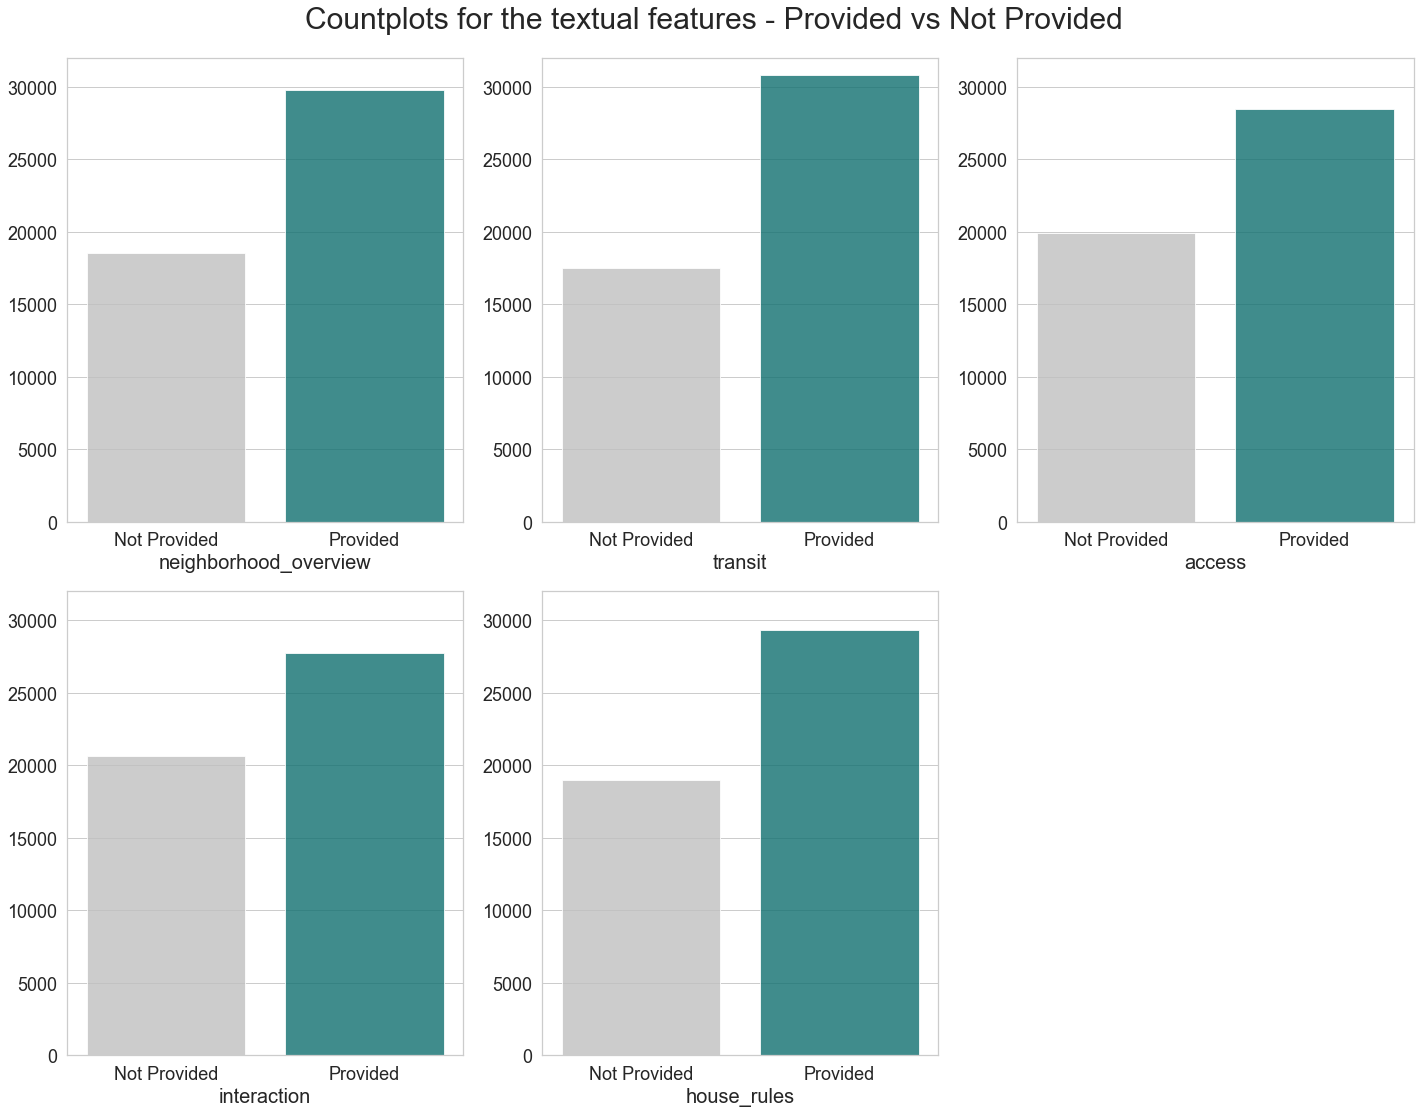

In [116]:
fig, ((ax1, ax2, ax3),(ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
axes=[ax1,ax2,ax3,ax4,ax5]
columns=['neighborhood_overview', 'transit', 'access', 'interaction','house_rules']

st = fig.suptitle("Countplots for the textual features - Provided vs Not Provided", fontsize=30)

for i in range(5):
    _=sns.countplot(x=columns[i], data=data, palette=["silver", "teal"], alpha=0.8, ax=axes[i])
    _.set(xticklabels=['Not Provided','Provided'])
    _.set_ylim(0,32000)
    _.set_xlabel(columns[i],fontsize=20)
    _.yaxis.label.set_visible(False)
    _.tick_params(axis = 'both', labelsize = 18)

st.set_y(1.03)
fig.subplots_adjust(top=0.80)
ax6.axis('off')   
plt.tight_layout()

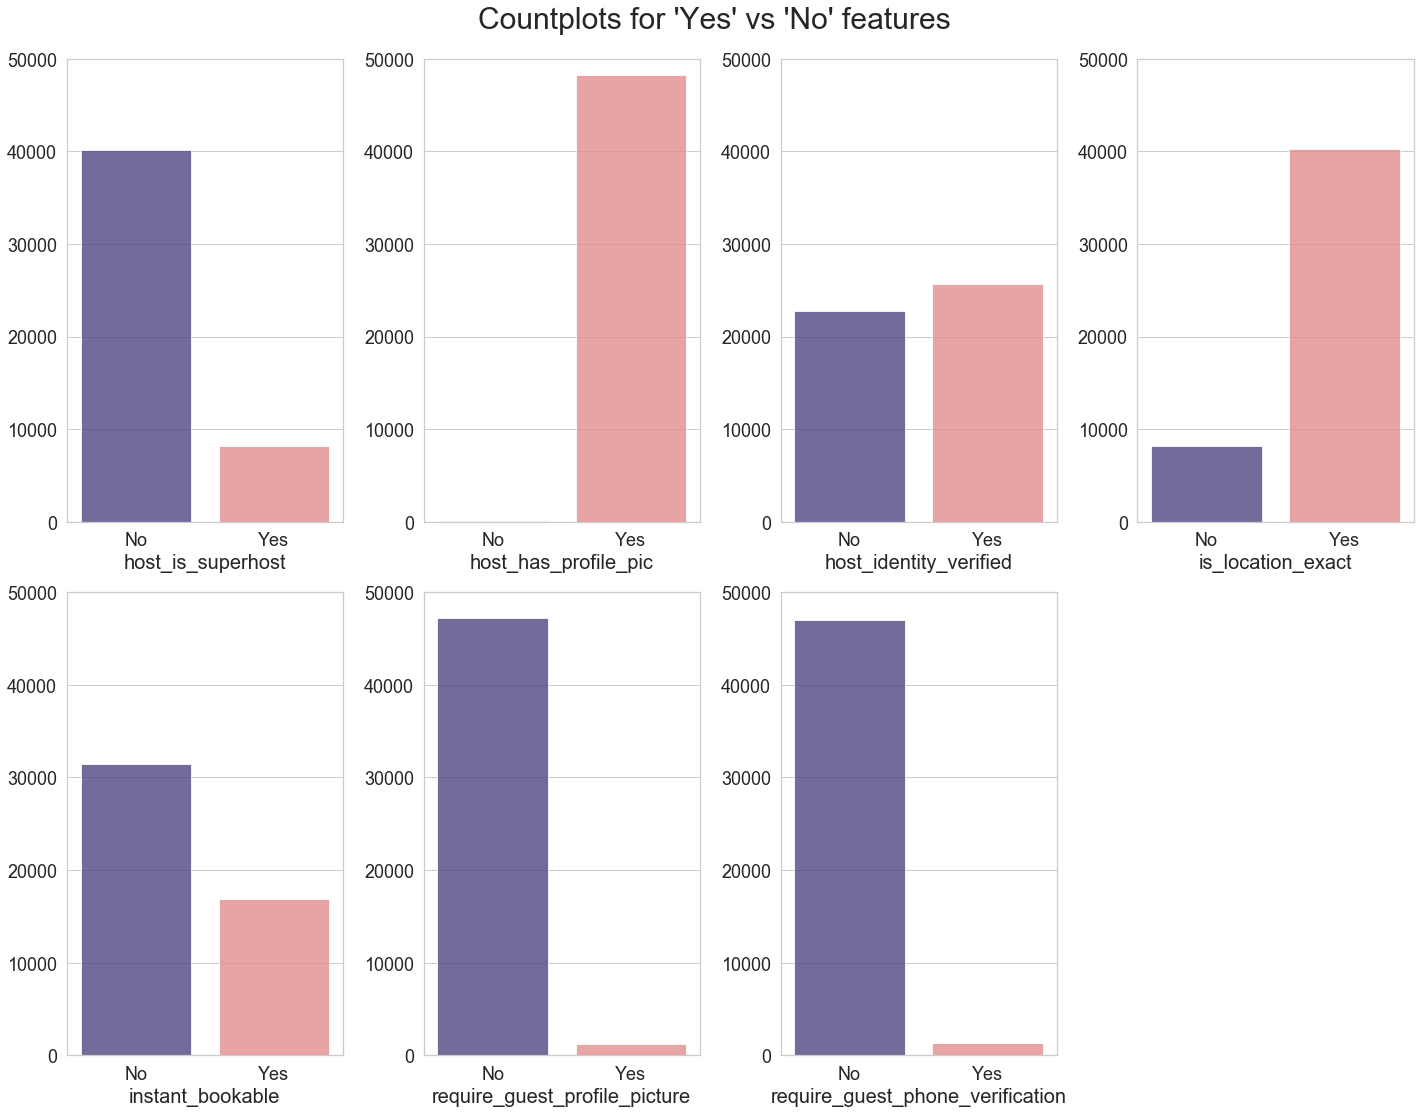

In [120]:
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(20,15))
axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7]
columns=['host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','instant_bookable',
        'require_guest_profile_picture','require_guest_phone_verification']

st = fig.suptitle("Countplots for 'Yes' vs 'No' features", fontsize=30)

for i in range(7):
    _=sns.countplot(x=columns[i], data=data, palette=["darkslateblue", "lightcoral"], alpha=0.8, ax=axes[i])
    _.set(xticklabels=['No','Yes'])
    _.set_ylim(0,50000)
    _.set_xlabel(columns[i],fontsize=20)
    _.yaxis.label.set_visible(False)
    _.tick_params(axis = 'both', labelsize = 18)
    
st.set_y(1.03)
fig.subplots_adjust(top=0.80)
ax8.axis('off')   
plt.tight_layout()


host_id,host_response_rate,host_total_listings_count,zipcode,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


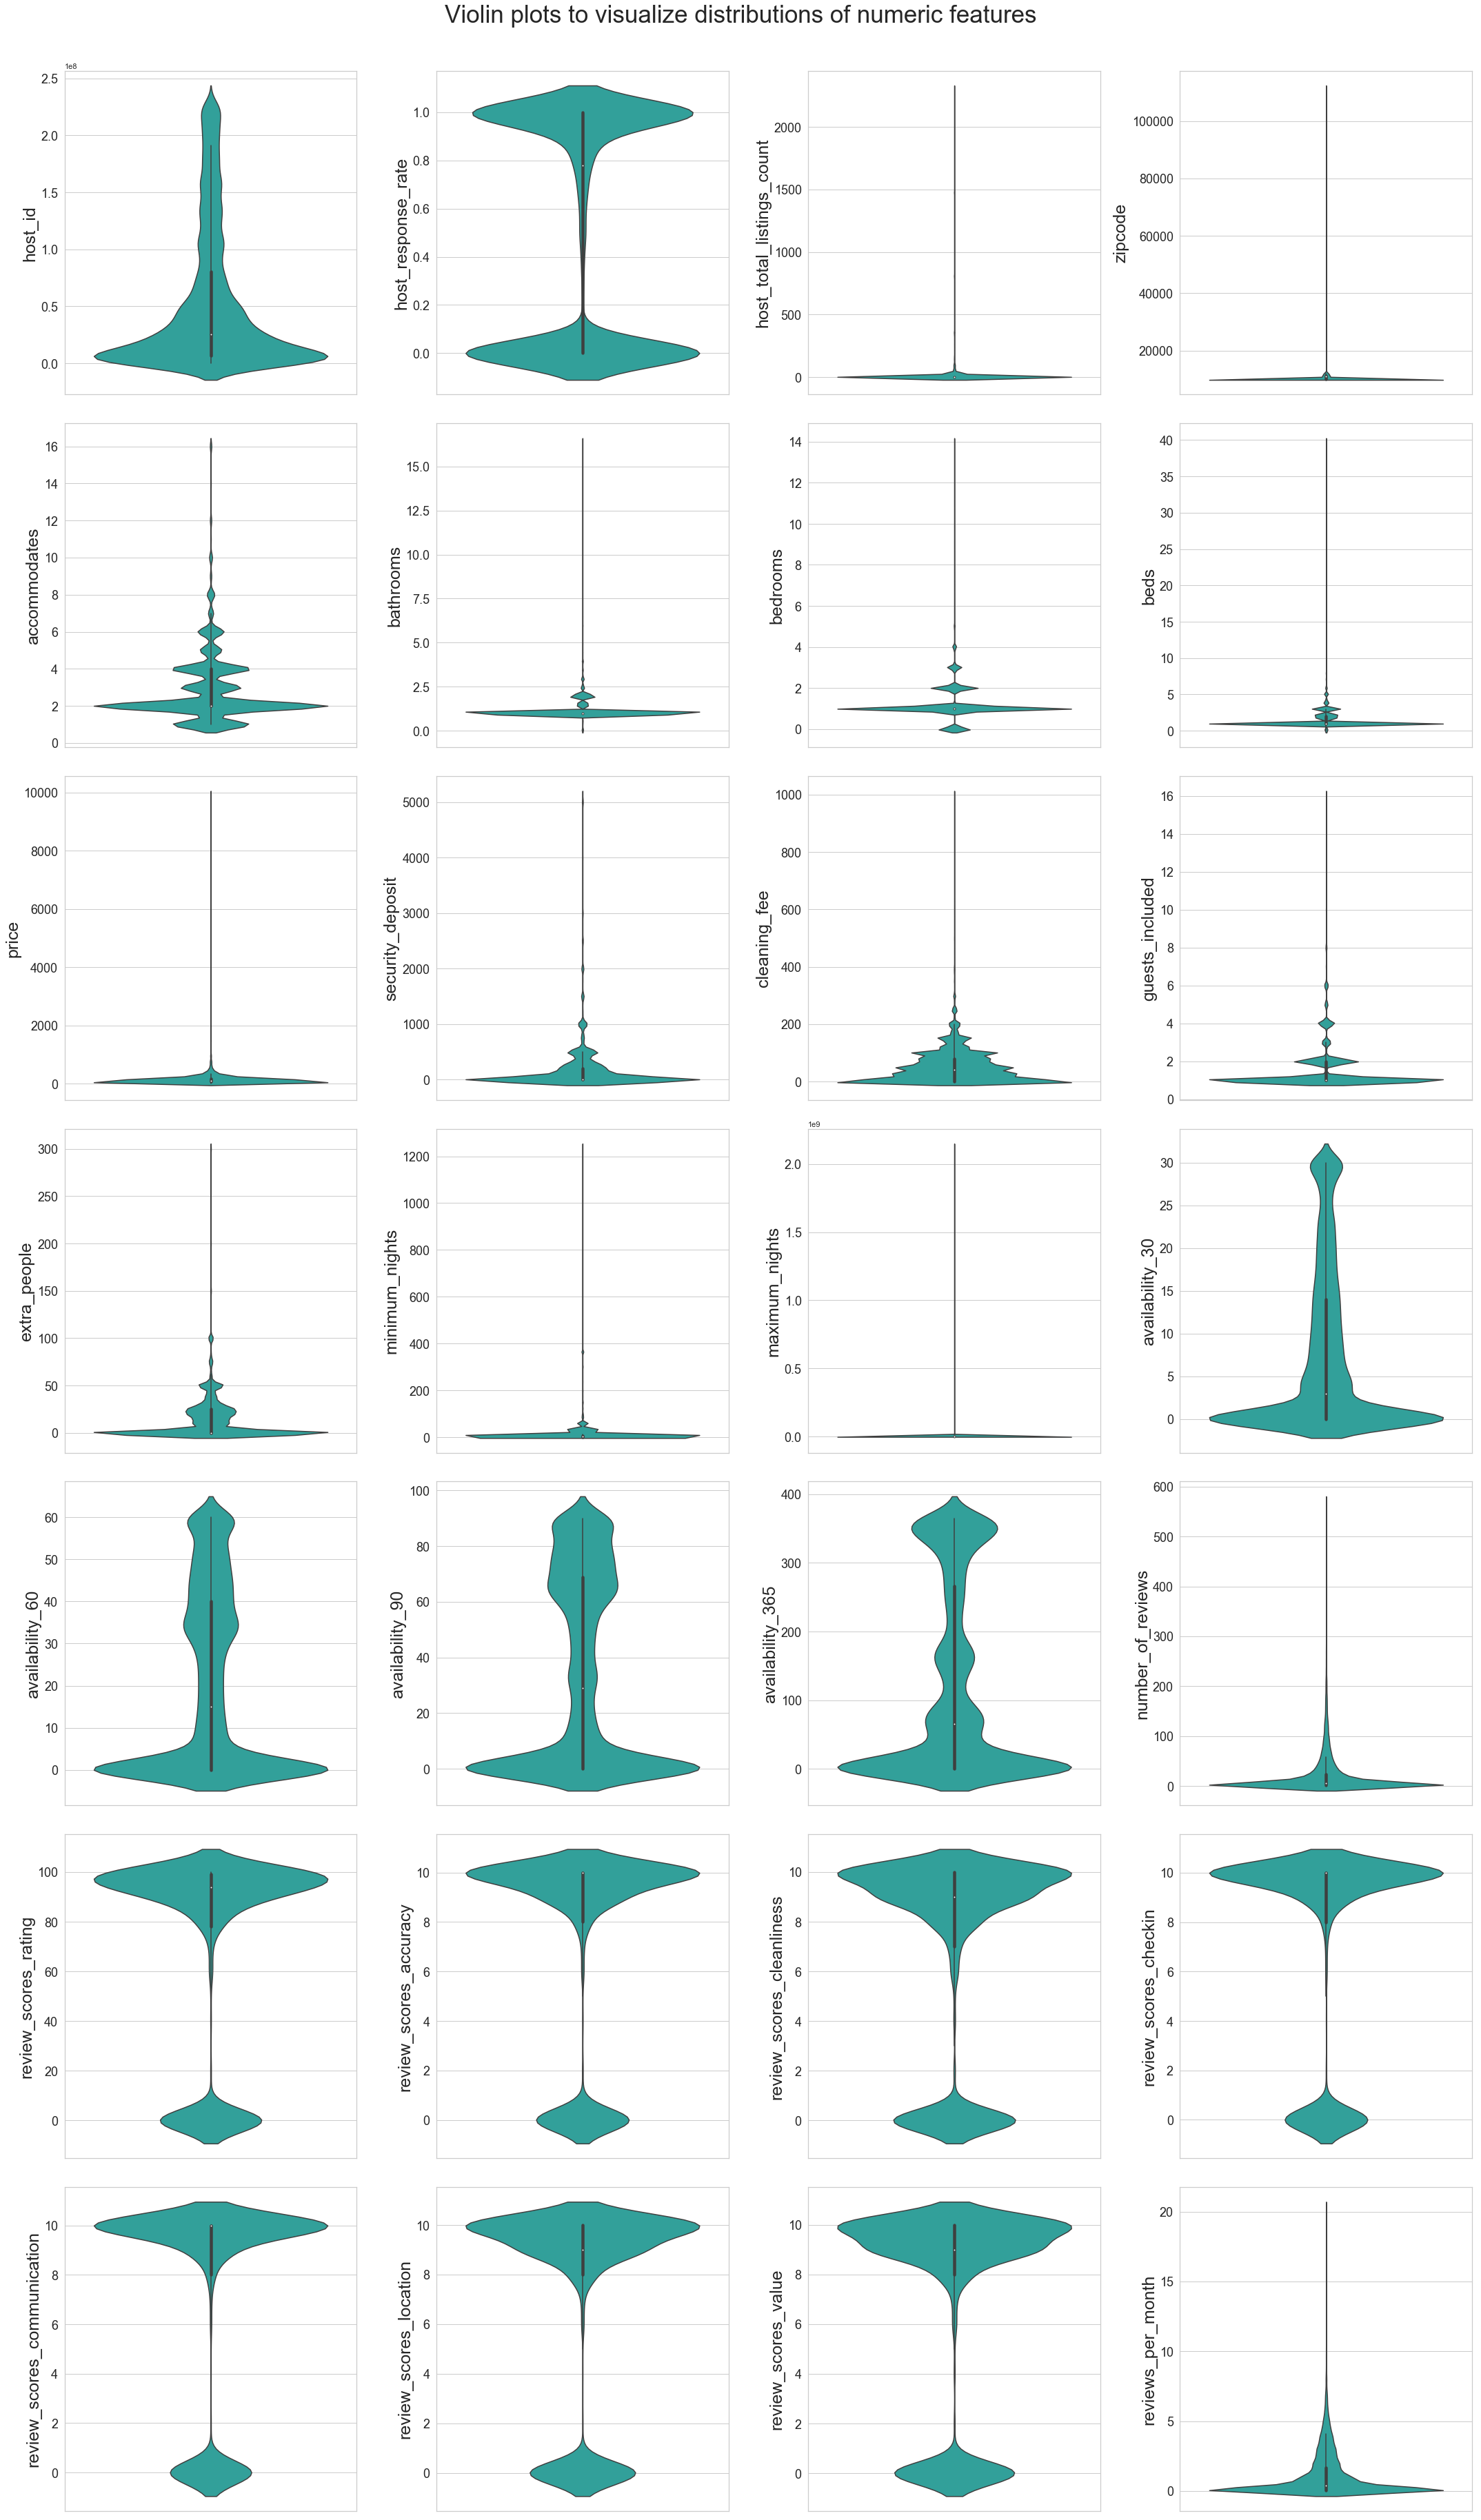

In [131]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20),
      (ax21,ax22,ax23,ax24),(ax25,ax26,ax27,ax28)) = plt.subplots(nrows=7, ncols=4, figsize=(30,50))

axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20,ax21,ax22,ax23,
      ax24,ax25,ax26,ax27,ax28]
columns=['host_id','host_response_rate','host_total_listings_count','zipcode','accommodates','bathrooms',
         'bedrooms','beds','price','security_deposit','cleaning_fee','guests_included','extra_people',
         'minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365',
         'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
         'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
         'reviews_per_month']

st = fig.suptitle("Violin plots to visualize distributions of numeric features", fontsize=35)

for i in range(28):
    _=sns.violinplot(y=columns[i], data=data, ax=axes[i],  alpha=0.8,  color='lightseagreen')
    _.set_ylabel(columns[i],fontsize=25)
    _.tick_params(labelsize = 18)
    
st.set_y(1.02)
fig.subplots_adjust(top=0.80)
plt.tight_layout()

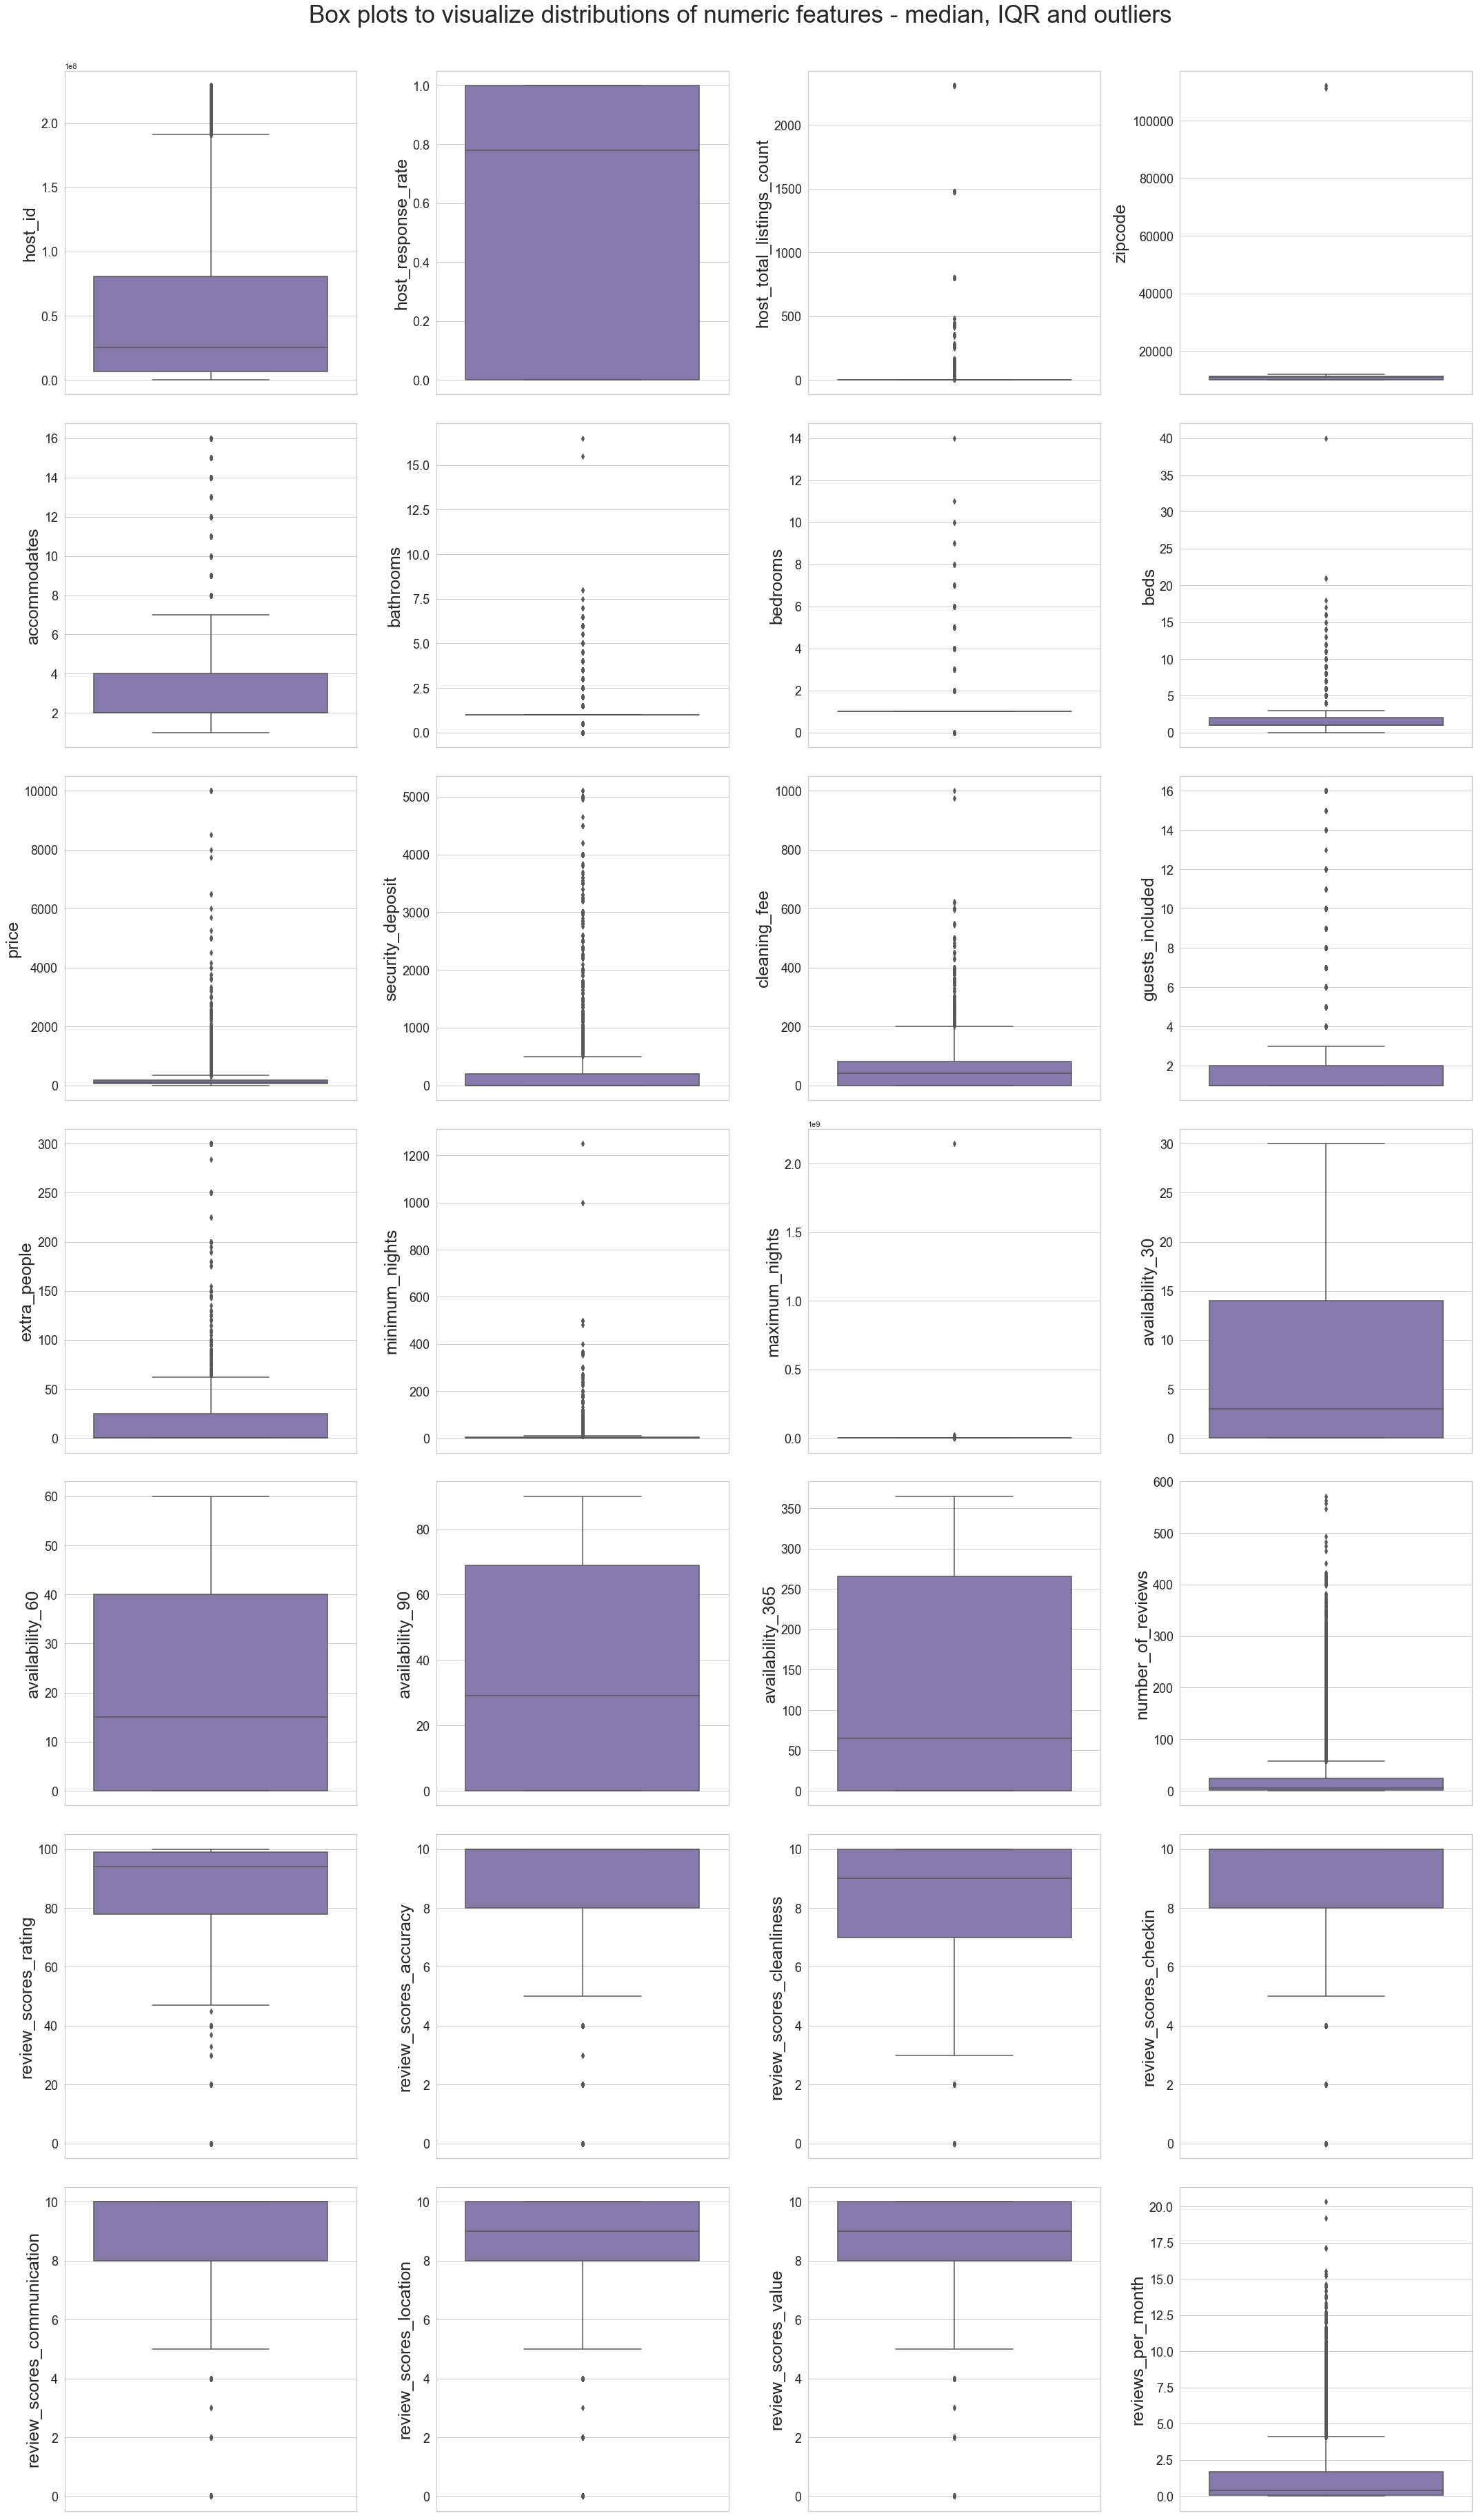

In [133]:
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16),(ax17,ax18,ax19,ax20),
      (ax21,ax22,ax23,ax24),(ax25,ax26,ax27,ax28)) = plt.subplots(nrows=7, ncols=4, figsize=(30,50))

axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17,ax18,ax19,ax20,ax21,ax22,ax23,
      ax24,ax25,ax26,ax27,ax28]
columns=['host_id','host_response_rate','host_total_listings_count','zipcode','accommodates','bathrooms',
         'bedrooms','beds','price','security_deposit','cleaning_fee','guests_included','extra_people',
         'minimum_nights','maximum_nights','availability_30','availability_60','availability_90','availability_365',
         'number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
         'review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
         'reviews_per_month']

st = fig.suptitle("Box plots to visualize distributions of numeric features - median, IQR and outliers", fontsize=35)

for i in range(28):
    _=sns.boxplot(y=columns[i], data=data, ax=axes[i], color='m')
    _.set_ylabel(columns[i],fontsize=25)
    _.tick_params(labelsize = 18)
    
st.set_y(1.02)
fig.subplots_adjust(top=0.80)
plt.tight_layout()

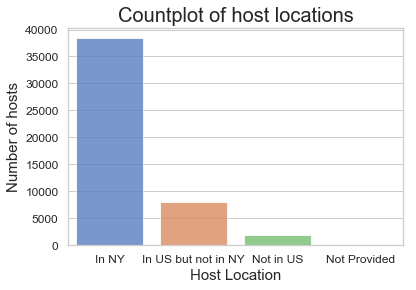

In [142]:
plt.title('Countplot of host locations', fontsize=20)
sns.countplot(x='host_location',data=data, palette='muted', alpha=0.8)
plt.xlabel('Host Location', fontsize=15)
plt.ylabel('Number of listings', fontsize=15)
plt.tick_params(labelsize = 12)

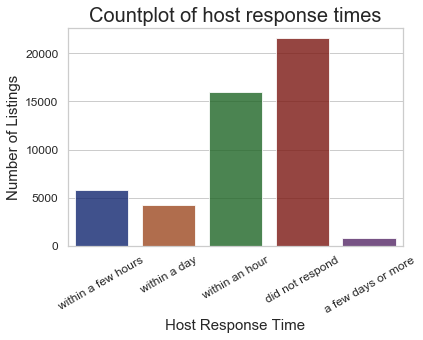

In [145]:
plt.title('Countplot of host response times', fontsize=20)
sns.countplot(x='host_response_time',data=data, palette='dark', alpha=0.8)
plt.xticks(rotation=30)
plt.xlabel('Host Response Time', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.tick_params(labelsize = 12)

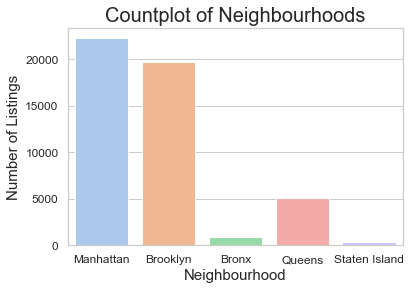

In [147]:
plt.title('Countplot of Neighbourhoods', fontsize=20)
sns.countplot(x='neighbourhood_group_cleansed',data=data, palette='pastel')
plt.xlabel('Neighbourhood', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.tick_params(labelsize = 12)

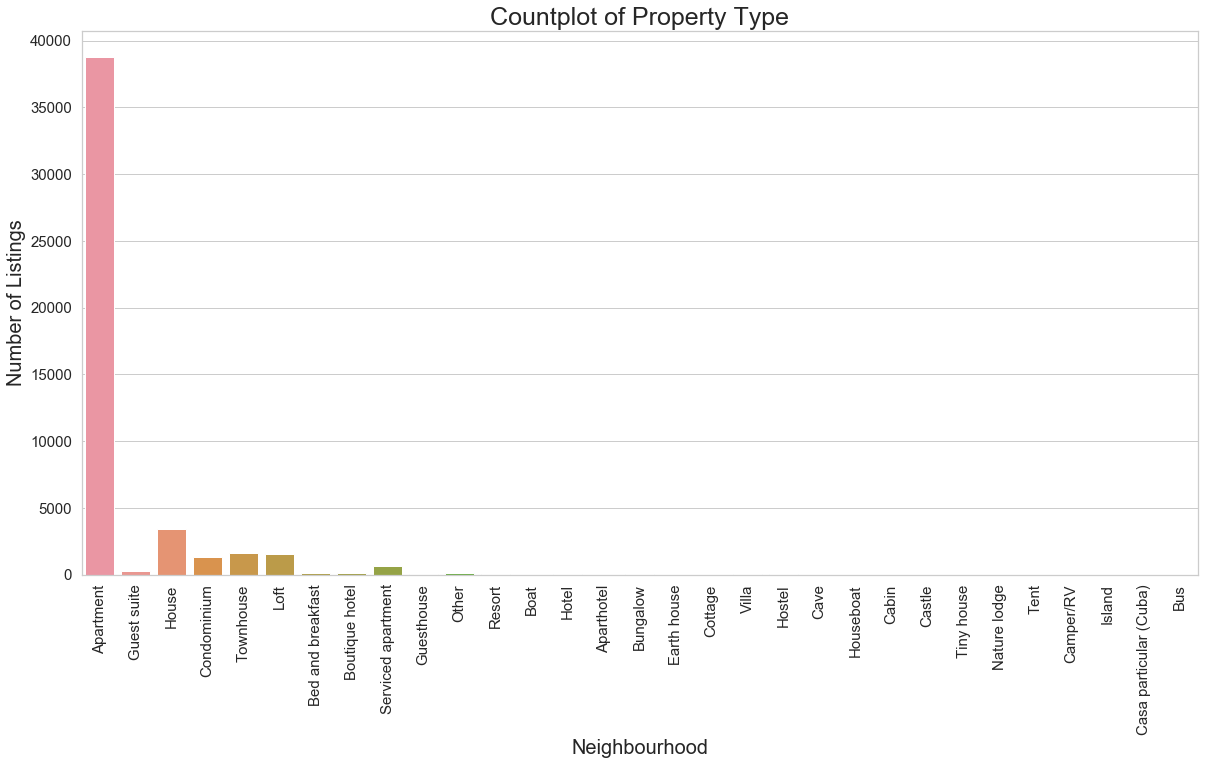

In [151]:
plt.figure(figsize=(20,10))
plt.title('Countplot of Property Type', fontsize=25)
sns.countplot(x='property_type',data=data)
plt.xticks(rotation=90)
plt.xlabel('Property Type', fontsize=20)
plt.ylabel('Number of Listings', fontsize=20)
plt.tick_params(labelsize = 15)

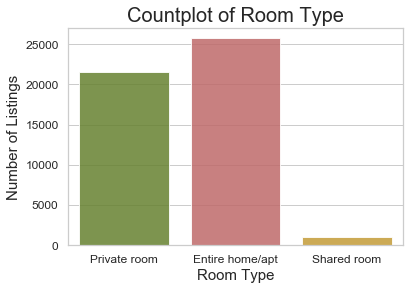

In [160]:
plt.title('Countplot of Room Type', fontsize=20)
sns.countplot(x='room_type',data=data, palette=['olivedrab','indianred','goldenrod'],alpha=0.85)
plt.xlabel('Room Type', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.tick_params(labelsize = 12)

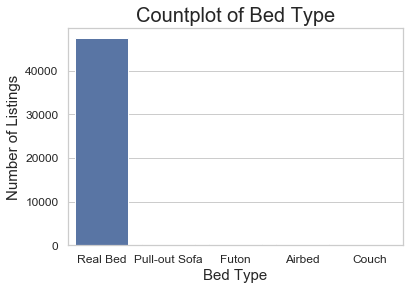

In [161]:
plt.title('Countplot of Bed Type', fontsize=20)
sns.countplot(x='bed_type',data=data)
plt.xlabel('Bed Type', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.tick_params(labelsize = 12)

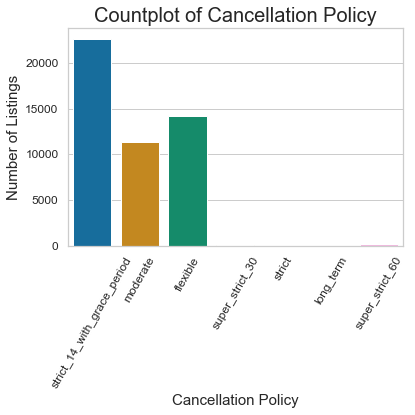

In [162]:
plt.title('Countplot of Cancellation Policy', fontsize=20)
sns.countplot(x='cancellation_policy',data=data, palette='colorblind')
plt.xticks(rotation=60)
plt.xlabel('Cancellation Policy', fontsize=15)
plt.ylabel('Number of Listings', fontsize=15)
plt.tick_params(labelsize = 12)

<BarContainer object of 128 artists>

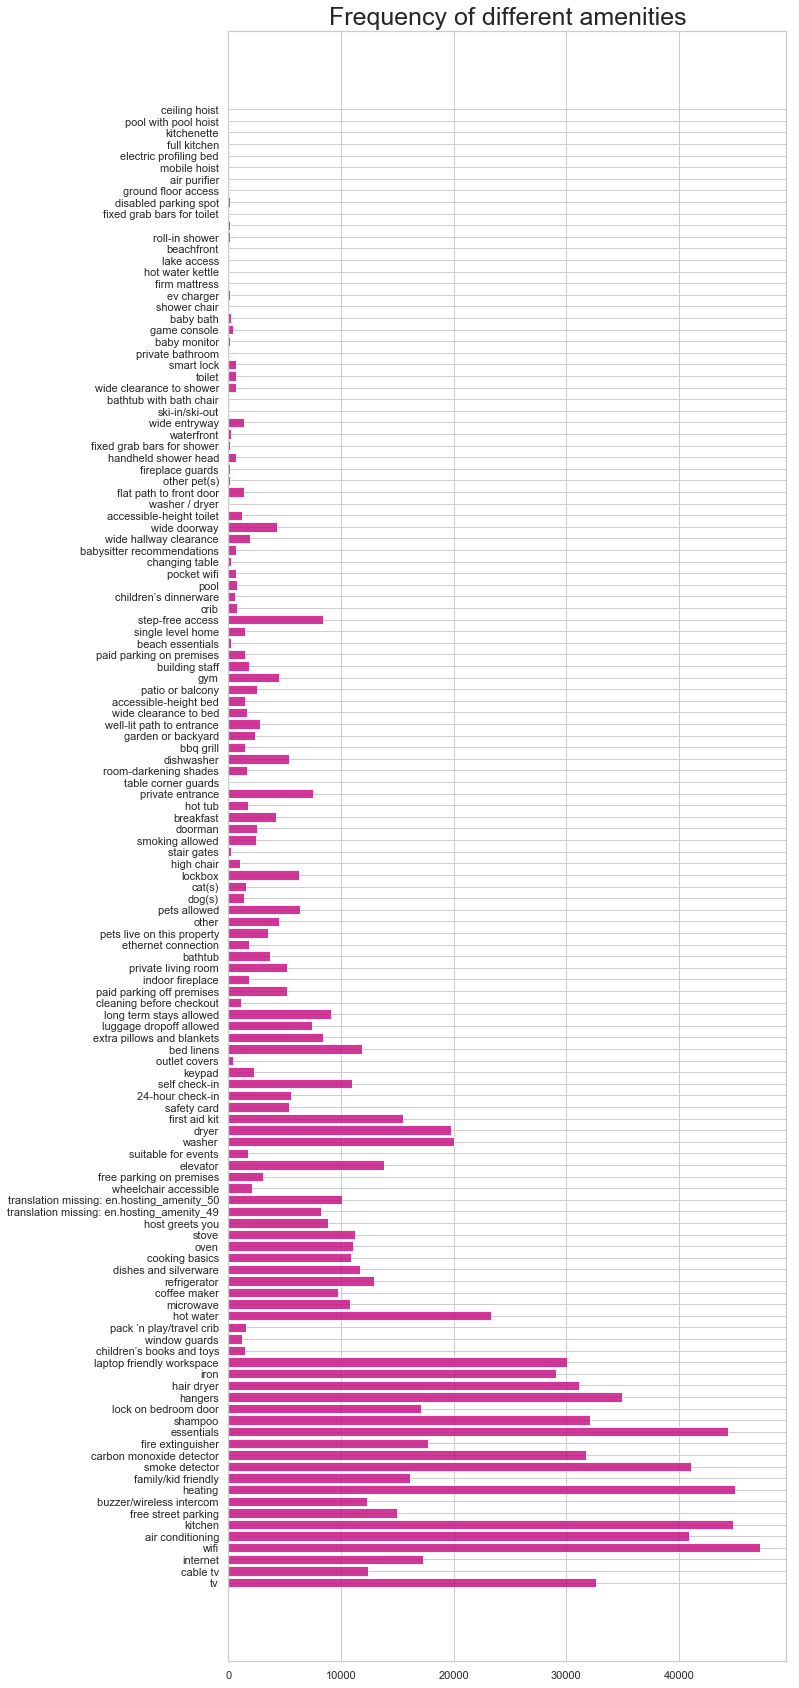

In [187]:
amenities=data['amenities']
amenities=amenities.str.strip('{}')
amenities=amenities.str.replace('\"','')
amenities=amenities.str.lower()
amenities_counts={}

for i in amenities:
    result = [x.strip() for x in i.split(',')]
    for each in result:
        if each in amenities_counts:
            amenities_counts[each]+=1
        else:
            amenities_counts[each]=1

amenity = list(amenities_counts.keys())
amenity_count = list(amenities_counts.values())
plt.figure(figsize=(10,30))
plt.title('Frequency of different amenities', fontsize=25)
plt.barh(range(len(amenities_counts)),amenity_count,tick_label=amenity, color='mediumvioletred', alpha=0.85)

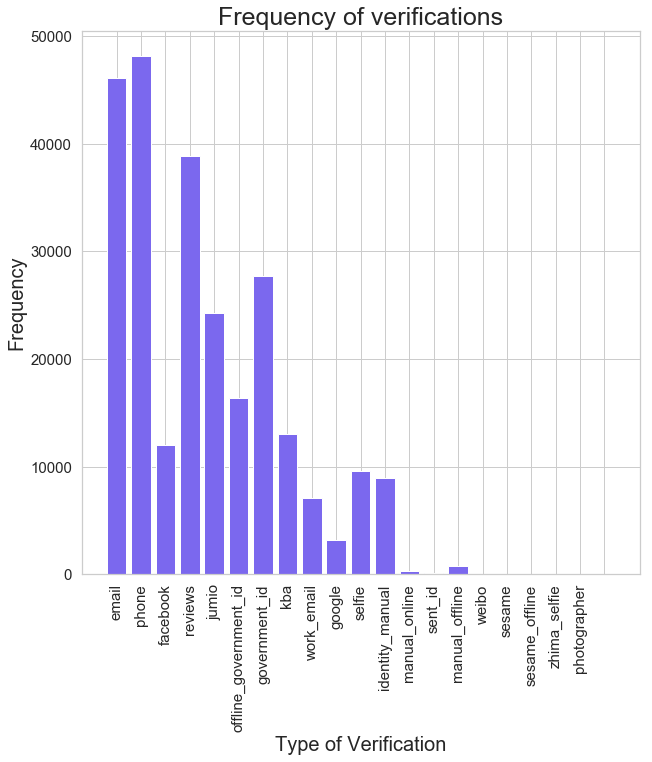

In [175]:
verifications=data['host_verifications']
verifications=verifications.str.strip('[]')
verifications=verifications.str.replace('\'','')
verifications=verifications.str.lower()

verification_counts={}
for i in verifications:
    result = [x.strip() for x in i.split(',')]
    for each in result:
        if each in verification_counts:
            verification_counts[each]+=1
        else:
            verification_counts[each]=1

verification = list(verification_counts.keys())
verification_count = list(verification_counts.values())
plt.figure(figsize=(10,10))
plt.title('Frequency of verifications', fontsize=25)
plt.bar(range(len(verification_count)),verification_count,tick_label=verification, color='mediumslateblue')
plt.xticks(rotation=90)
plt.xlabel('Type of Verification', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.tick_params(labelsize = 15)

## Bivariate Analysis

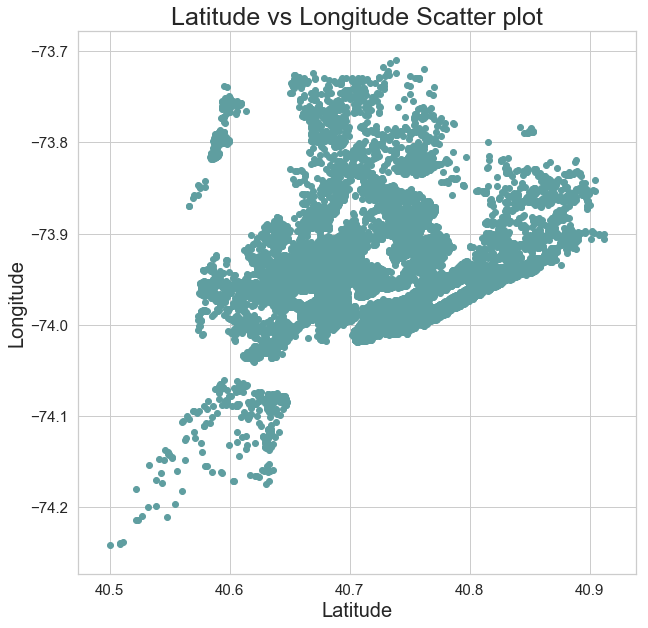

In [173]:
plt.figure(figsize=(10,10))
plt.title('Latitude vs Longitude Scatter plot', fontsize=25)
plt.scatter(x='latitude', y='longitude', data=data, color='cadetblue')
plt.xlabel('Latitude', fontsize=20)
plt.ylabel('Longitude', fontsize=20)
plt.tick_params(labelsize = 15)

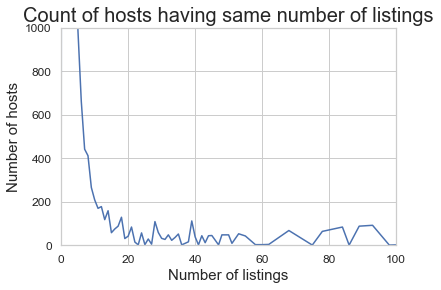

In [177]:
listing_freq=data.groupby('host_total_listings_count')['host_id'].count()
listing_freq=dict(listing_freq)

plt.title('Count of hosts having same number of listings', fontsize=20)
plt.plot(list(listing_freq.keys()), list(listing_freq.values()))
plt.xlim([0,100])
plt.ylim([0,1000])
plt.xlabel('Number of listings', fontsize=15)
plt.ylabel('Number of hosts', fontsize=15)
plt.tick_params(labelsize = 12)

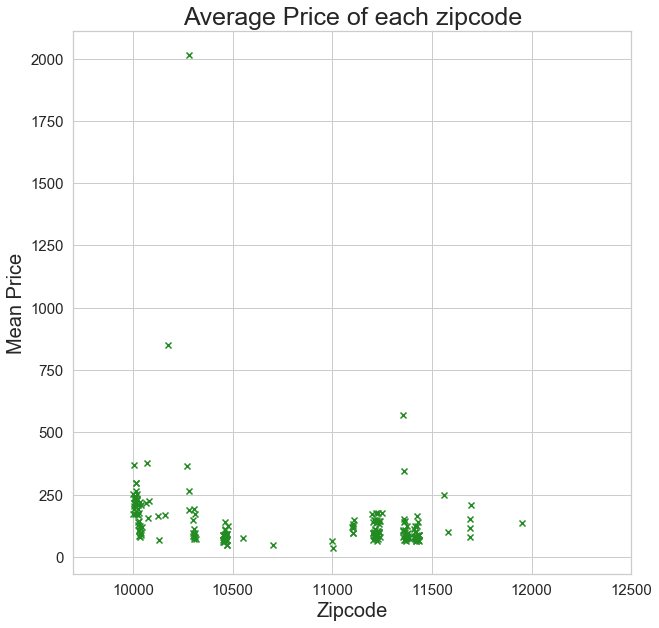

In [184]:
zipcode_price=data.groupby('zipcode')['price'].mean()
zipcode_price=dict(zipcode_price)

plt.figure(figsize=(10,10))
plt.title('Average Price of each zipcode', fontsize=25)
plt.scatter(zipcode_price.keys(), zipcode_price.values(), color='forestgreen', marker='x')
plt.xlim([9700,12500])
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Mean Price', fontsize=20)
plt.tick_params(labelsize = 15)

Text(0,0.5,'Neighbourhood')

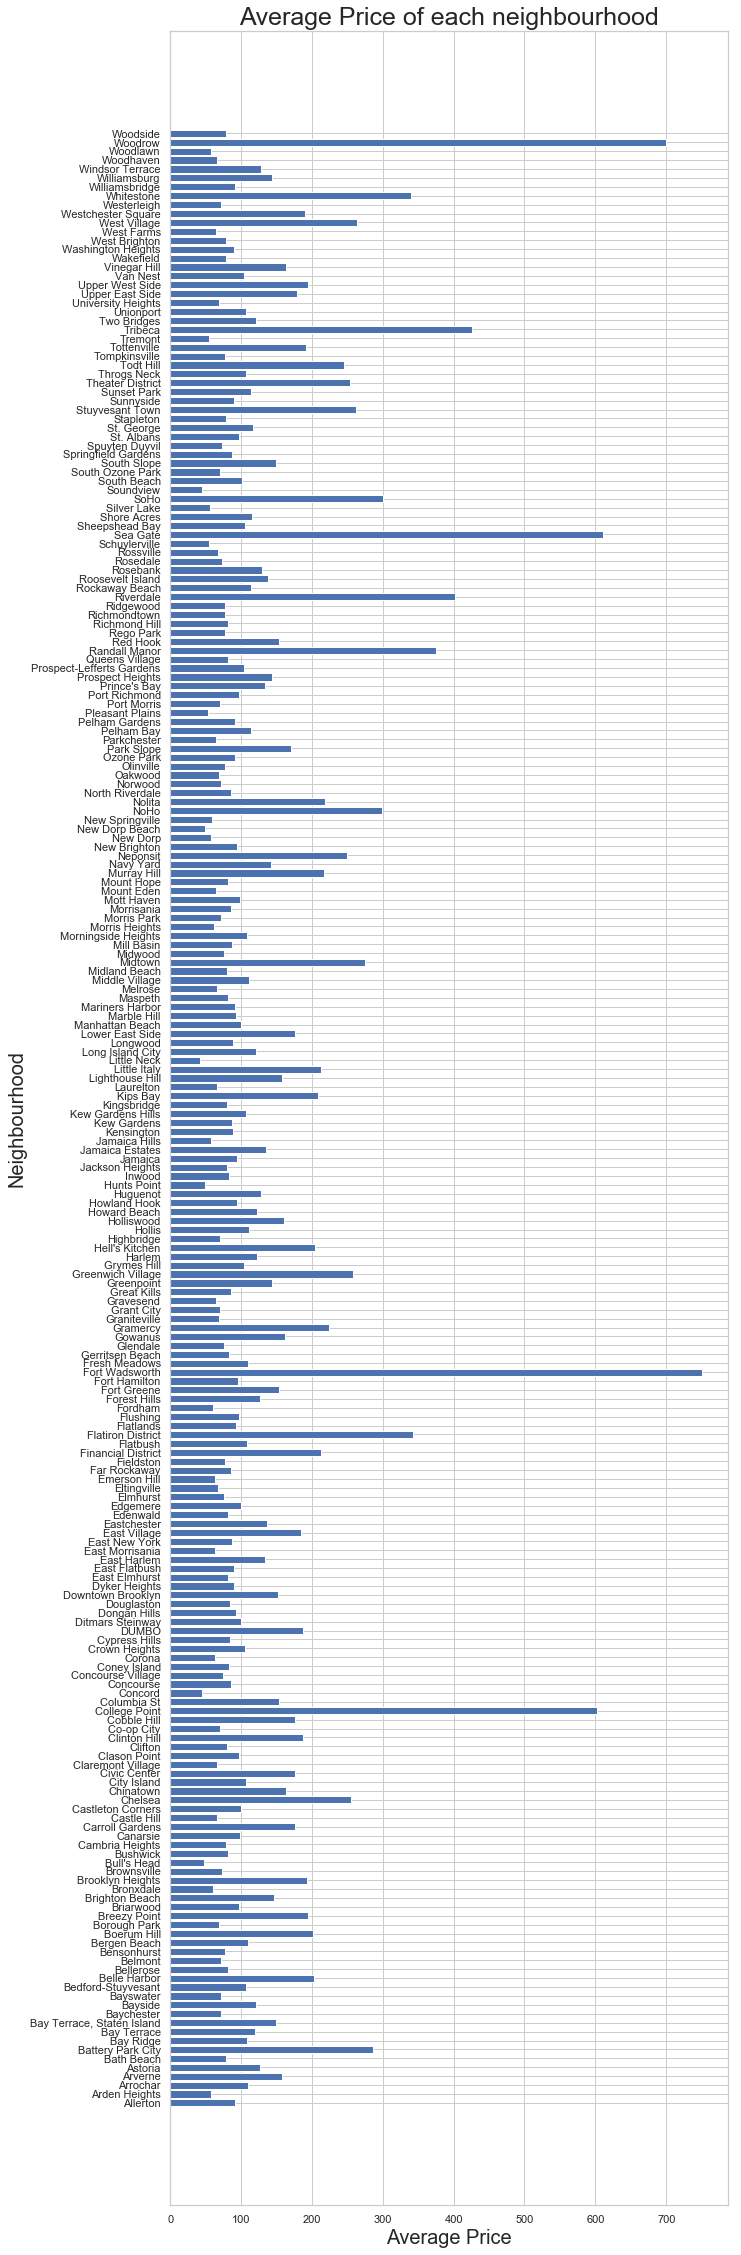

In [188]:
neighbourhood_price=data.groupby('neighbourhood_cleansed')['price'].mean()
neighbourhood_price=dict(neighbourhood_price)
plt.figure(figsize=(10,40))
plt.title('Average Price of each neighbourhood', fontsize=25)
plt.barh(list(neighbourhood_price.keys()),list( neighbourhood_price.values()))
plt.xlabel('Average Price', fontsize=20)
plt.ylabel('Neighbourhood', fontsize=20)

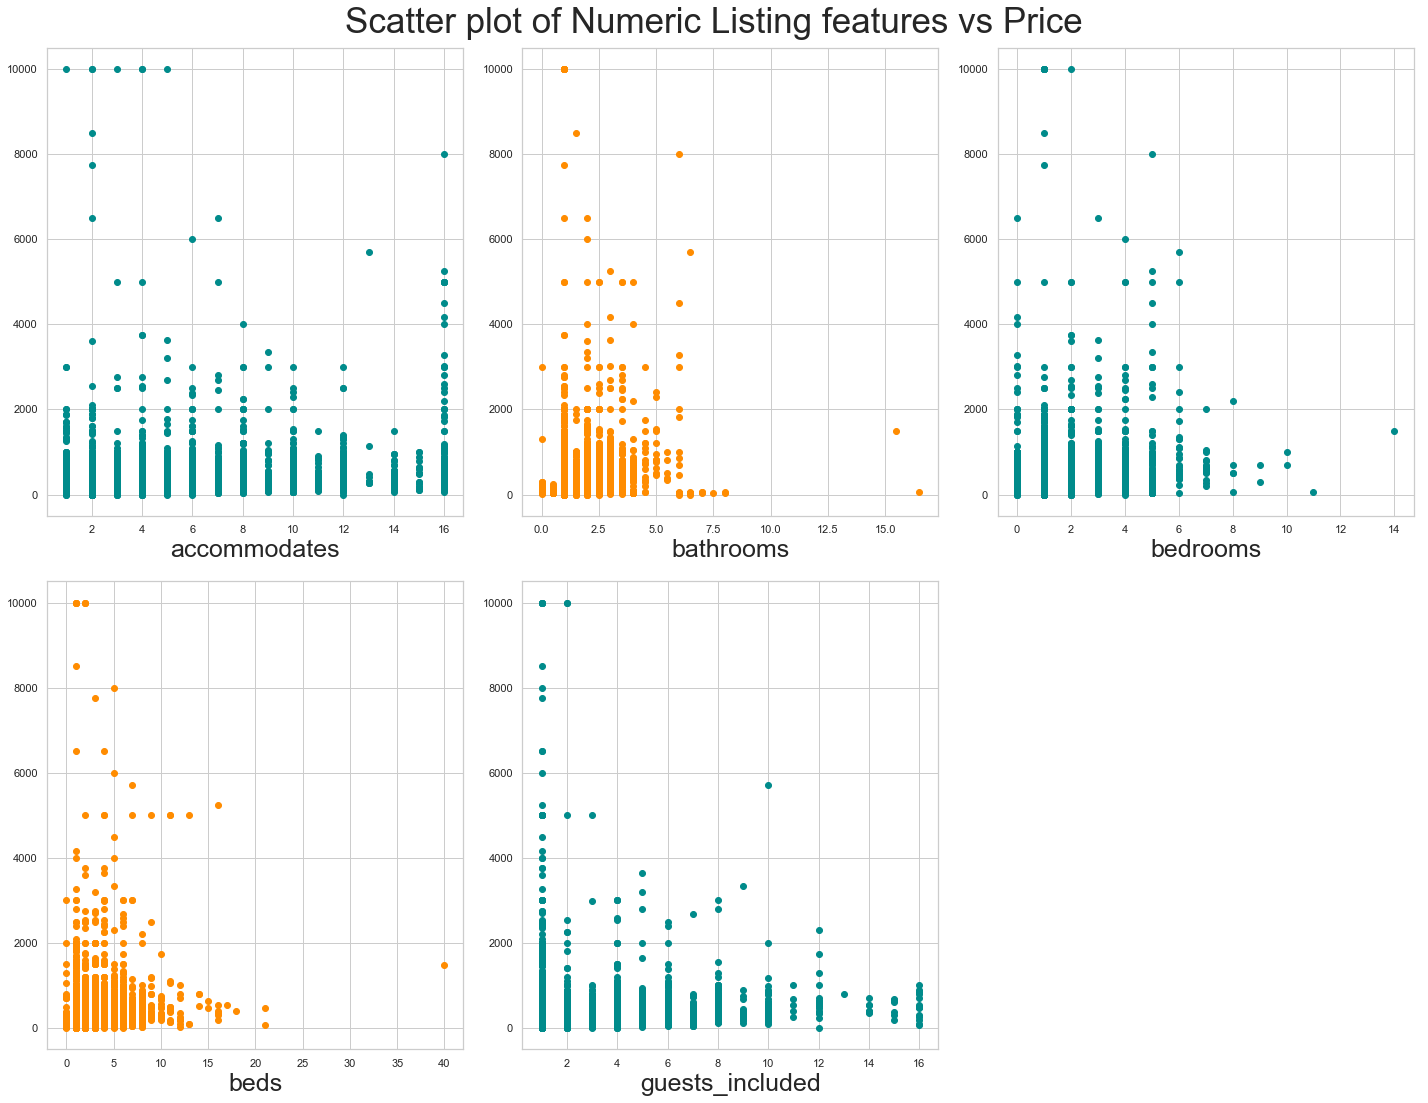

In [192]:
fig, ((ax1, ax2, ax3),(ax4, ax5,ax6)) = plt.subplots(nrows=2, ncols=3, figsize=(20,15))
axes=[ax1,ax2,ax3,ax4,ax5]
columns=['accommodates','bathrooms','bedrooms','beds','guests_included']
colors=['darkcyan','darkorange','darkcyan','darkorange','darkcyan']
st = fig.suptitle("Scatter plot of Numeric Listing features vs Price", fontsize=35)

for i in range(5):
    axes[i].scatter(x=columns[i], y='price', data=data,color=colors[i])
    axes[i].set_xlabel(columns[i],fontsize=25)
    
st.set_y(1.02)
fig.subplots_adjust(top=0.80)
ax6.axis('off')   
plt.tight_layout()

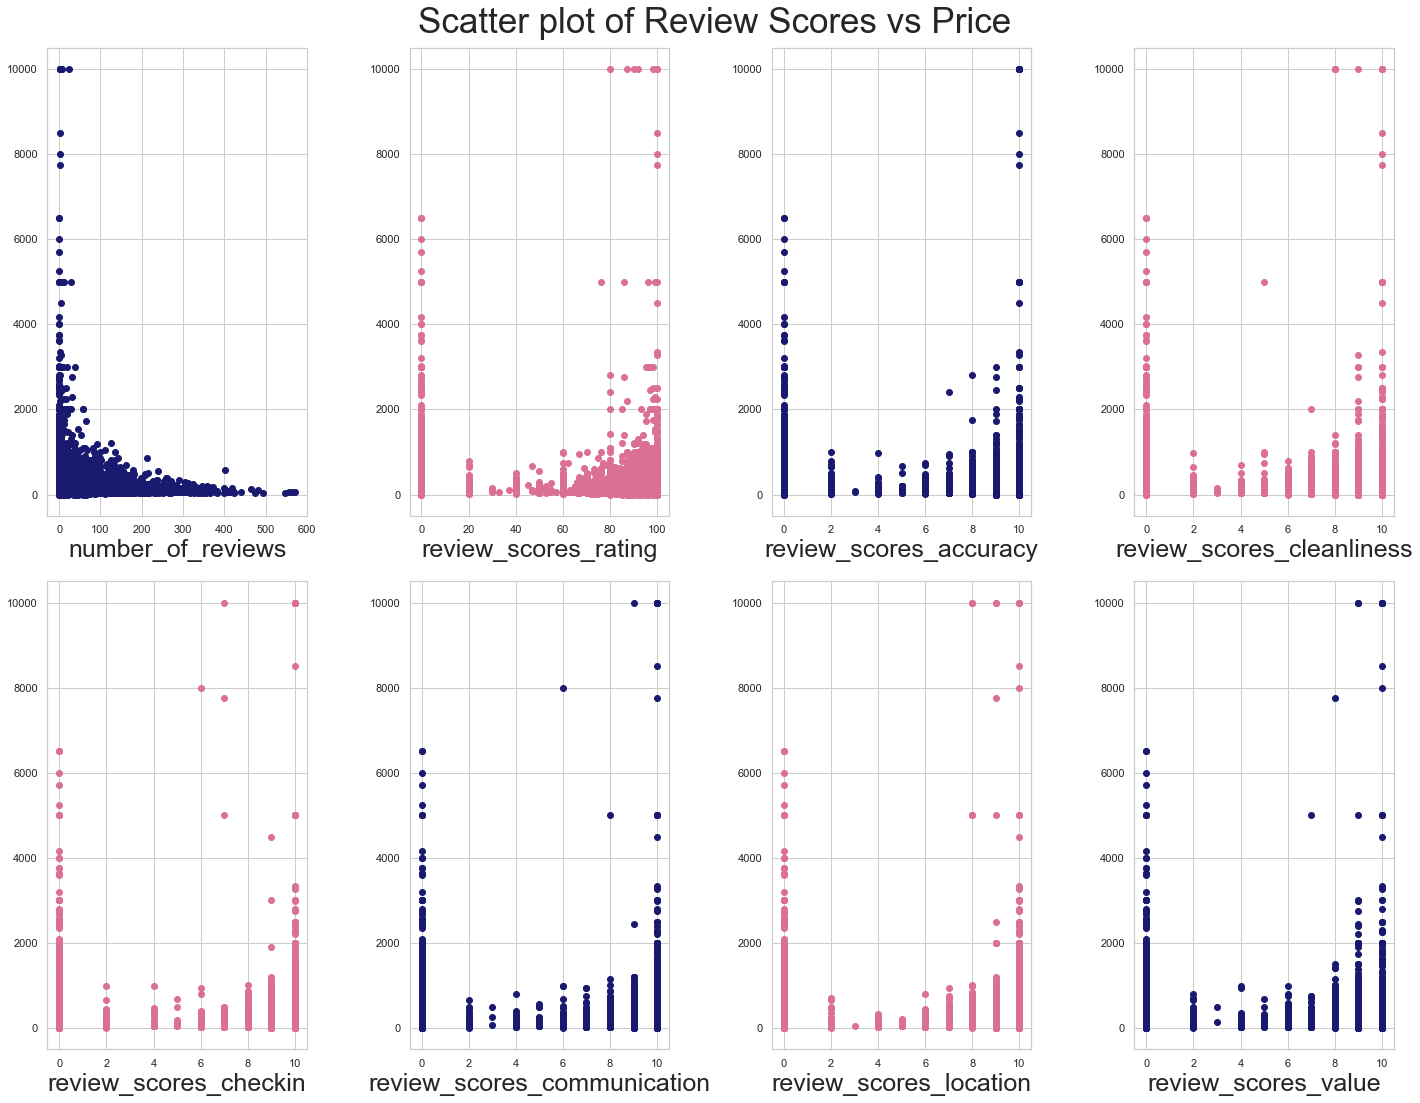

In [193]:
fig, ((ax1, ax2, ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(nrows=2, ncols=4, figsize=(20,15))
axes=[ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
columns=['number_of_reviews','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 
         'review_scores_checkin','review_scores_communication', 'review_scores_location','review_scores_value']
colors=['midnightblue','palevioletred','midnightblue','palevioletred','palevioletred','midnightblue',
        'palevioletred','midnightblue']

st = fig.suptitle("Scatter plot of Review Scores vs Price", fontsize=35)

for i in range(8):
    axes[i].scatter(x=columns[i], y='price', data=data,color=colors[i])
    axes[i].set_xlabel(columns[i],fontsize=25)
    
st.set_y(1.02)
fig.subplots_adjust(top=0.80)
plt.tight_layout()

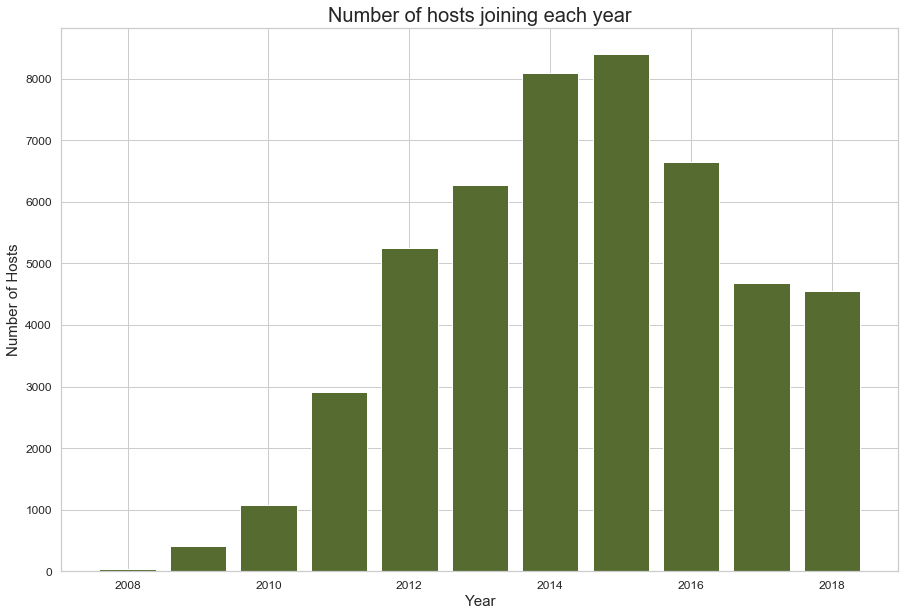

In [198]:
host_since=pd.to_datetime(data['host_since'], format='%Y-%m-%d')
host_year=(host_since.apply(lambda x: x.year)).values

host_year_dict={}
for year in host_year:
    if year in host_year_dict:
        host_year_dict[year]+=1
    else:
        host_year_dict[year]=1

plt.figure(figsize=(15,10))        
plt.title('Number of hosts joining each year', fontsize=20)
plt.bar(host_year_dict.keys(),host_year_dict.values(), color='darkolivegreen')
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Hosts', fontsize=15)
plt.tick_params(labelsize = 12)

In [66]:
host_since=host_since.to_frame()

In [70]:
host_since.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48353 entries, 0 to 48352
Data columns (total 1 columns):
host_since    48353 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 377.8 KB


In [72]:
host_since['year']=host_since['host_since'].apply(lambda x: x.year)
host_since['month']=host_since['host_since'].apply(lambda x: x.month)

In [76]:
host_since.groupby(['year','month']).count()

host_since
year month            
2008 8               1
     9              19
     10              6
     11              7
     12              2
2009 1               6
     2              32
     3              16
     4              14
     5              24
     6              32
     7              56
     8              26
     9              22
     10             32
     11             63
     12             84
2010 1              55
     2              42
     3              57
     4              43
     5              87
     6              85
     7             120
     8             122
     9              86
     10            104
     11            138
     12            136
2011 1              99
...                ...
2016 7             523
     8             493
     9             430
     10            350
     11            454
     12            569
2017 1             347
     2             309
     3             432
     4             347
     5             453
     6             531
     7             428
     8             361
     9             279
     10            409
     11            401
     12            390
2018 1             291
     2             332
     3             457
     4             310
     5             408
     6             367
     7             570
     8             393
     9             426
     10            430
     11            493
     12             77

[125 rows x 1 columns]